In [1]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
from dotenv import load_dotenv
import os
import requests
from bs4 import BeautifulSoup
from statsmodels.multivariate.pca import PCA
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import linear_model



In [2]:
df8 = pd.read_csv('df8')

In [3]:
df9 = df8.drop('release_date', axis=1)

In [4]:
X = df9.loc[:, df9.columns != 'revenue']
y = df9['revenue']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [6]:
clf = svm.SVR(gamma=0.000001)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)

In [7]:
y_pred

array([38574367.02018205, 38574366.90343253, 38574367.02018205,
       38574369.64559403, 38574367.02018205, 38574367.00839028,
       38574367.02018205, 38574367.02018205, 38574367.02018205,
       38574368.12460173, 38574367.02018205, 38574367.42963161,
       38574368.80667508, 38574367.02017876, 38574366.56098434,
       38574367.02018218, 38574367.31661287, 38574367.01878697,
       38574367.75454626, 38574364.62068852, 38574366.98228408,
       38574366.6537229 , 38574367.85205824, 38574367.02018205,
       38574372.2535862 , 38574367.36234611, 38574367.02018205,
       38574367.02018205, 38574367.57561718, 38574367.02018205,
       38574367.02018205, 38574367.02018205, 38574367.02018205,
       38574367.02018205, 38574367.69520111, 38574369.26541216,
       38574374.56885641, 38574367.03534456, 38574367.02018205,
       38574367.02017485, 38574370.92336593, 38574370.55314635,
       38574368.23566101, 38574367.02012914, 38574368.1007198 ,
       38574367.02018205, 38574365.34628

In [8]:
df6 = pd.read_csv('df6')

In [9]:
df6.columns

Index(['id', 'title', 'release_date', 'runtime', 'original_language', 'genres',
       'production_countries', 'budget', 'vote_average', 'vote_count',
       'popularity', 'revenue', 'imdb_id', 'directors', 'cast'],
      dtype='object')

In [10]:
df6.drop(['id','title','original_language','release_date','genres','production_countries','imdb_id','directors','cast'], axis=1, inplace=True)

In [11]:
df6.shape

(4039, 6)

In [12]:
df6 = df6[(df6.budget>1000) & (df6.revenue>1000)]

In [13]:
df6.shape

(4021, 6)

In [14]:
df6 = df6[(df6.revenue<1200000000)]

In [15]:
df6.shape

(4013, 6)

In [16]:
df6.corr()

,runtime,budget,vote_average,vote_count,popularity,revenue
runtime,1.000000,0.240033,0.390189,0.260255,0.199626,0.234380
budget,0.240033,1.000000,-0.012931,0.541581,0.451011,0.716754
vote_average,0.390189,-0.012931,1.000000,0.368117,0.292072,0.195973
vote_count,0.260255,0.541581,0.368117,1.000000,0.765559,0.757208
popularity,0.199626,0.451011,0.292072,0.765559,1.000000,0.623907
revenue,0.234380,0.716754,0.195973,0.757208,0.623907,1.000000


In [17]:
df6.describe()

,runtime,budget,vote_average,vote_count,popularity,revenue
count,4013.000000,4.013000e+03,4013.000000,4013.000000,4013.000000,4.013000e+03
mean,109.191627,3.561974e+07,6.240294,796.355844,24.528162,9.836075e+07
std,20.363959,4.104907e+07,0.887971,1269.586420,32.850513,1.570341e+08
min,41.000000,1.100000e+03,1.900000,1.000000,0.001586,1.097000e+03
25%,95.000000,8.000000e+06,5.700000,97.000000,7.050951,1.001704e+07
50%,105.000000,2.100000e+07,6.300000,330.000000,16.318608,3.827548e+07
75%,119.000000,4.900000e+07,6.800000,903.000000,32.144440,1.161124e+08
max,338.000000,3.800000e+08,9.300000,13752.000000,875.581305,1.156731e+09


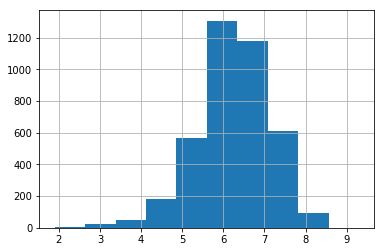

In [18]:
df6.vote_average.hist()

In [58]:
df6.head()

,runtime,budget,vote_average,vote_count,popularity,revenue
1,169.0,300000000,6.9,4500,139.082615,961000000
2,148.0,245000000,6.3,4466,107.376788,880674609
3,165.0,250000000,7.6,9106,112.312950,1084939099
4,132.0,260000000,6.1,2124,43.926995,284139100
5,139.0,258000000,5.9,3576,115.699814,890871626


In [83]:
df10 = df6.copy()

In [65]:
bins = (1, 5.5, 7, 10)
group_names = ['Bad', 'Average', 'Excellent']
df10['vote_bins'] = pd.cut(df10['vote_average'], bins = bins, labels = group_names)

In [66]:
df10.vote_bins.value_counts()

Average      2486
Bad           819
Excellent     708
Name: vote_bins, dtype: int64

In [67]:
df10.drop('vote_average', axis=1, inplace=True)

In [68]:
y = df10.vote_bins
X = df10.loc[:, df10.columns != 'vote_bins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [77]:
svc = svm.SVC(gamma=0.0000001)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [78]:
svc_conf_matrix = confusion_matrix(y_test, y_pred)
svc_acc_score = accuracy_score(y_test, y_pred)
print(svc_conf_matrix)
print(svc_acc_score*100)

[[487   1   0]
 [166   0   0]
 [149   0   0]]
60.647571606475715


In [79]:
y_pred

array(['Average', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Bad', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Average', 'Average', 'Average', 'Ave

In [84]:
df11 = df10.copy()

In [85]:
df11 = df11[df11.revenue<100000000]

In [86]:
bins = (1, 5.5, 7, 10)
group_names = ['Bad', 'Average', 'Excellent']
df11['vote_bins'] = pd.cut(df11['vote_average'], bins = bins, labels = group_names)

In [88]:
df11.vote_bins.value_counts()

Average      1728
Bad           691
Excellent     447
Name: vote_bins, dtype: int64

In [89]:
df11.drop('vote_average', axis=1, inplace=True)

In [90]:
y = df11.vote_bins
X = df11.loc[:, df11.columns != 'vote_bins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
svc = svm.SVC(gamma=0.0000000000001, C=100000)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [134]:
svc_conf_matrix = confusion_matrix(y_test, y_pred)
svc_acc_score = accuracy_score(y_test, y_pred)
print(svc_conf_matrix)
print(svc_acc_score*100)

[[239  55  49]
 [101  26  10]
 [ 69  11  14]]
48.606271777003485


In [42]:
X = df6.loc[:, df6.columns != 'revenue']
y = df6['revenue']
display(X.head()), display(y.head())

,runtime,budget,vote_average,vote_count,popularity
1,169.0,300000000,6.9,4500,139.082615
2,148.0,245000000,6.3,4466,107.376788
3,165.0,250000000,7.6,9106,112.312950
4,132.0,260000000,6.1,2124,43.926995
5,139.0,258000000,5.9,3576,115.699814


1     961000000
2     880674609
3    1084939099
4     284139100
5     890871626
Name: revenue, dtype: int64

(None, None)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(3210, 803, 3210, 803)

In [44]:
y.min(), y.max()

(1097, 1156730962)

In [45]:
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(X_train, y_train) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [46]:
y_pred = clf.predict(X_test)

In [47]:
y_test.shape

(803,)

In [48]:
y_pred.shape

(803,)

In [49]:
svr_score = clf.score(y_test, y_pred)
svr_score

ValueError: Expected 2D array, got 1D array instead:
array=[1.22996680e+07 9.51462830e+07 1.72923810e+07 1.96297600e+07
 1.86495200e+06 1.59212469e+08 2.95417900e+07 4.61983149e+08
 1.14660880e+07 1.15922175e+08 1.92812350e+07 5.39097510e+07
 4.57100590e+07 6.69276000e+05 8.19939000e+05 1.01624843e+08
 4.74968763e+08 5.67559900e+06 5.02478200e+06 1.11378010e+07
 7.88748430e+07 1.74720000e+04 1.96397415e+08 8.10824700e+06
 2.20000000e+07 1.17758500e+08 1.26546825e+08 2.29074524e+08
 3.01119500e+06 2.41547200e+06 7.66698060e+07 4.03326800e+06
 9.85341000e+05 9.75520500e+07 1.44000000e+07 3.50576960e+07
 2.84914200e+06 1.23146510e+07 8.15250000e+04 4.03170142e+08
 2.15877000e+07 2.86102000e+06 2.35483004e+08 1.19452000e+05
 1.73829820e+07 4.00062763e+08 9.36170090e+07 7.80852400e+06
 7.25000000e+07 1.09449237e+08 5.77835300e+06 5.66530000e+04
 1.18666000e+05 8.90000000e+06 1.04876233e+08 1.23426320e+07
 6.86967700e+07 2.54829310e+07 4.63004500e+06 5.20000000e+08
 6.95229000e+05 1.35560026e+08 1.91919700e+06 3.54023200e+07
 1.83345589e+08 4.18693100e+06 4.41758000e+06 4.71173600e+06
 1.32140300e+07 1.53083102e+08 3.16729070e+07 6.40524500e+06
 1.02825796e+08 1.89833357e+08 5.35874040e+07 9.75720000e+07
 1.22233971e+08 3.06417700e+07 8.57611174e+08 1.13019290e+08
 2.88189950e+07 3.68780809e+08 1.55446362e+08 3.25756637e+08
 1.04571380e+09 3.09256900e+07 7.67474410e+07 1.38351300e+07
 3.22115200e+06 5.24258550e+07 3.91081192e+08 1.04297070e+07
 1.24272124e+08 1.60886100e+07 7.20000000e+06 7.45976430e+07
 4.91112020e+07 4.41966840e+07 6.54643240e+07 4.18488000e+05
 5.51811290e+07 5.28500000e+04 2.45676146e+08 9.37000000e+07
 5.18011870e+07 1.29956730e+07 6.26467630e+07 1.23724100e+07
 1.45678830e+07 1.18880016e+08 1.49217355e+08 3.03120000e+04
 1.81674817e+08 2.43843127e+08 3.25561190e+07 4.36568220e+07
 9.37725220e+07 1.17719158e+08 3.85680446e+08 3.84136060e+07
 4.34931230e+07 5.21098800e+06 1.59375308e+08 3.50071800e+07
 1.03735000e+05 1.52126100e+06 1.40470746e+08 5.93790000e+04
 5.65061200e+07 1.77200000e+08 9.08155580e+07 2.18613188e+08
 7.05717432e+08 1.30000000e+07 1.24827750e+07 5.95202980e+07
 5.87160300e+06 3.34615000e+08 3.20170008e+08 3.63513500e+07
 1.36267476e+08 1.17185950e+07 1.24881062e+08 4.98000000e+07
 1.13857533e+08 1.77243185e+08 8.89291110e+07 3.39658430e+07
 4.12376480e+07 2.29422210e+07 1.42044638e+08 3.71700570e+07
 3.16996000e+05 1.76262340e+07 1.02272000e+06 6.04461800e+06
 4.77200000e+08 1.91799690e+07 6.55350670e+07 1.47700200e+06
 2.06172544e+08 1.73013509e+08 9.70816000e+05 3.35154643e+08
 9.50160000e+04 1.36789130e+07 1.12483764e+08 7.64327270e+07
 7.23000000e+06 1.98466200e+06 3.25771424e+08 2.88347692e+08
 4.89029530e+07 9.53114340e+07 2.74925095e+08 2.93329073e+08
 2.74470394e+08 2.50000000e+06 1.31962450e+07 3.51779700e+06
 9.62749200e+06 7.52215857e+08 2.01634991e+08 6.02899120e+07
 2.86214286e+08 2.00804534e+08 2.04594016e+08 4.31015940e+07
 1.01393569e+08 3.91711300e+07 4.64880000e+04 1.75372502e+08
 6.58847030e+07 1.00000000e+07 3.58991681e+08 7.50780000e+04
 3.44093900e+06 2.45084600e+06 2.03800000e+04 7.01818900e+06
 1.87361754e+08 1.44216468e+08 6.07000000e+07 1.31000000e+07
 1.63743280e+07 1.91840150e+07 2.13783610e+07 6.67342200e+06
 1.32180323e+08 1.36817650e+07 4.49658300e+06 3.96731620e+07
 5.43513985e+08 5.00075460e+07 6.38334490e+07 1.03374770e+07
 1.05316267e+08 5.21660000e+04 1.05441430e+07 9.11964190e+07
 3.14432665e+08 2.35926552e+08 3.53624124e+08 2.95064640e+07
 6.08961470e+07 4.43766250e+07 3.74400000e+04 2.06273720e+07
 1.74463257e+08 3.03025485e+08 1.30608430e+07 8.77540440e+07
 4.48621870e+07 6.85723780e+07 4.23404000e+06 1.89484250e+07
 8.05737740e+07 4.00112100e+06 3.19127930e+07 9.35255860e+07
 9.60476330e+07 3.52114312e+08 9.28631400e+06 4.88149090e+07
 3.34728500e+07 4.17970660e+07 2.21683590e+07 1.53695730e+07
 1.00000000e+04 7.77473000e+06 1.52159461e+08 8.00000000e+06
 4.38623600e+06 4.83307570e+07 1.60000000e+07 2.94000000e+07
 3.27216350e+07 4.97971480e+07 4.33677183e+08 2.21656080e+07
 5.24400510e+07 1.04324083e+08 1.78043761e+08 5.51123560e+07
 4.49326618e+08 2.72742922e+08 1.40767956e+08 2.45360480e+08
 6.86732280e+07 1.14663461e+08 2.24339150e+07 6.29416100e+06
 2.00342000e+06 2.22000000e+07 2.95238201e+08 1.24914842e+08
 1.30000000e+07 1.03207500e+06 1.11220900e+07 7.88870300e+06
 5.93894330e+07 5.21749800e+06 1.51021270e+07 1.53997819e+08
 7.82582000e+06 5.51575390e+07 5.70961900e+07 1.47080413e+08
 2.28108900e+06 1.51714750e+07 3.75832800e+06 3.41631208e+08
 1.35680000e+08 1.98033800e+06 3.45304300e+06 2.58022233e+08
 1.14660784e+08 9.00000000e+06 3.96600000e+08 6.60000000e+06
 2.58997970e+07 9.29131710e+07 1.17000000e+08 8.09164920e+07
 5.07523370e+07 4.77746500e+06 2.58420000e+07 6.37820780e+07
 1.05197635e+08 3.71876278e+08 9.51494350e+07 1.54471540e+07
 7.69653595e+08 1.15608060e+07 8.50000000e+08 2.39254920e+07
 1.02549111e+09 2.10885680e+07 2.95468000e+05 1.15772733e+08
 1.11308890e+07 1.49673788e+08 1.27825080e+07 2.49027230e+07
 2.15000000e+08 9.26287400e+08 2.96400000e+03 3.60000000e+07
 2.89997000e+06 3.04260960e+07 8.40258160e+07 4.27000000e+06
 4.49072600e+07 5.72809000e+05 7.09827462e+08 1.25494850e+07
 4.07602906e+08 1.22195920e+08 1.22444772e+08 4.29310410e+07
 8.50000000e+06 8.69304110e+07 2.18172980e+07 1.22915111e+08
 1.92330738e+08 3.15560610e+07 7.30524280e+07 1.87500000e+08
 7.00000000e+07 6.60940780e+08 1.81950000e+04 7.11865020e+07
 1.33960541e+08 3.03180100e+06 5.38545880e+07 5.46060000e+04
 1.21147947e+08 1.17195061e+08 1.56085450e+07 2.99965036e+08
 3.73175580e+07 1.81466833e+08 3.75662300e+07 5.00231000e+06
 1.21214377e+08 9.31072890e+07 3.20000000e+07 1.28388320e+08
 1.10879513e+08 2.23387299e+08 1.09700000e+03 7.71121760e+07
 1.03722910e+07 5.22939820e+07 6.67071200e+06 3.51348200e+07
 8.00354020e+07 1.21756000e+05 7.48806957e+08 1.60602194e+08
 2.18003020e+07 1.80622424e+08 4.11707840e+07 1.25327770e+07
 4.34900570e+07 3.09492681e+08 3.63487840e+07 1.48412065e+08
 8.52206000e+05 1.40000000e+08 5.39772500e+07 7.42082670e+07
 3.73552094e+08 8.66585580e+07 4.00000000e+06 2.93671430e+07
 1.59291809e+08 1.69308840e+07 7.18683270e+07 9.76475550e+08
 6.62845518e+08 1.22919055e+08 1.14178613e+08 7.10698840e+07
 5.68250000e+04 9.99657530e+07 1.50081610e+07 2.38940000e+07
 3.00500280e+07 4.16274310e+07 5.94682750e+07 2.55629240e+07
 1.15760870e+07 8.63623720e+07 1.52925093e+08 8.33043300e+07
 7.49523050e+07 4.21051110e+07 5.60704330e+07 1.02146470e+07
 3.62744280e+08 8.47423452e+08 1.81973980e+07 1.97776470e+07
 7.39486030e+07 5.51847210e+07 2.31568300e+06 9.70091500e+07
 6.83694340e+07 1.15267375e+08 1.60388063e+08 1.15505027e+08
 3.33574760e+07 2.81611600e+06 2.42786137e+08 1.40000000e+07
 5.99019130e+07 7.76282650e+07 3.40779200e+07 4.47039950e+07
 1.86536150e+07 2.00276000e+08 1.65194600e+07 6.90556950e+07
 1.97011640e+07 1.25586134e+08 1.27906624e+08 1.38000000e+07
 8.43000000e+07 2.32640700e+06 3.02469017e+08 1.44600000e+07
 1.12374700e+09 5.42643420e+07 4.00000000e+06 4.95540020e+07
 2.27308420e+07 5.08771450e+07 8.67589120e+07 1.37945000e+05
 1.50000000e+07 2.29147509e+08 9.81265650e+07 2.47694660e+07
 1.49044513e+08 3.58372926e+08 1.21969216e+08 5.35964500e+06
 1.87674000e+05 2.22104681e+08 4.29196500e+06 1.91502426e+08
 1.24305181e+08 9.13535010e+07 6.94713380e+08 1.48730000e+04
 1.98685114e+08 5.62984740e+07 3.67275019e+08 4.69281400e+06
 9.86257750e+07 1.18578300e+06 4.14000000e+07 2.61542110e+07
 6.80401600e+06 2.62000000e+06 1.05415230e+07 1.25537191e+08
 6.28820900e+07 4.20000000e+07 2.07194510e+07 4.70889900e+07
 1.20550000e+04 2.04092000e+06 1.74365090e+07 4.55007970e+07
 5.59690000e+07 1.68726710e+07 1.00138851e+08 1.54749918e+08
 3.56929200e+07 1.16019547e+08 3.12894100e+06 8.35578720e+07
 1.62944923e+08 3.62302190e+07 1.33718711e+08 6.10872000e+06
 1.54271920e+07 1.70362582e+08 6.34648610e+07 1.20000000e+07
 3.05360130e+07 1.07217396e+08 4.57696359e+08 4.15967800e+06
 4.85736700e+06 3.76141306e+08 9.09445100e+06 1.66626200e+06
 1.17724610e+07 1.26216940e+08 1.88126000e+05 3.05232260e+07
 3.05070000e+05 7.46085700e+07 6.40885520e+07 2.40159255e+08
 1.00455844e+09 1.50962475e+08 1.40807547e+08 4.80279700e+07
 2.12256100e+06 8.09362320e+07 1.09676311e+08 1.56556650e+07
 2.26071200e+06 2.76454910e+07 8.00000000e+06 3.16360478e+08
 2.45527149e+08 7.80000000e+06 3.89925971e+08 1.52812860e+07
 1.49705852e+08 2.94804195e+08 1.87479518e+08 2.00000000e+06
 2.20000000e+06 9.23746740e+07 8.46060300e+07 1.36200750e+07
 2.50649836e+08 1.09140510e+09 1.61238510e+07 5.44272402e+08
 9.40000000e+07 1.66719200e+06 1.20173690e+07 2.95493000e+05
 3.00000000e+07 8.10916000e+06 1.17831631e+08 2.15454000e+06
 2.63663700e+06 1.58851357e+08 3.92675150e+07 6.02513710e+07
 2.22114260e+07 7.67820459e+08 2.02466756e+08 1.28978000e+05
 1.78727960e+07 9.33959197e+08 1.57107755e+08 3.92000694e+08
 7.56372800e+06 5.03637900e+07 1.18059170e+07 2.60095987e+08
 1.06543900e+06 3.08192500e+06 1.79213434e+08 1.95268056e+08
 1.64590040e+07 7.45544700e+06 4.07711549e+08 1.69852759e+08
 1.06303988e+08 1.81242620e+07 8.36297228e+08 4.52365430e+07
 9.04000000e+07 9.97568400e+06 4.64655000e+05 8.22021500e+06
 1.35559880e+07 2.09154650e+07 1.50277000e+05 2.52790400e+06
 8.66999000e+05 1.71269535e+08 5.62816256e+08 1.69800980e+07
 5.63706000e+05 1.34748021e+08 1.43751810e+07 4.10241000e+05
 1.92452832e+08 3.45051100e+07 2.99224720e+07 3.94076160e+07
 6.52105443e+08 3.47234916e+08 2.43400000e+08 1.39000000e+08
 2.35800000e+07 5.82024000e+05 1.94364900e+06 1.29266061e+08
 2.87928194e+08 5.05491070e+07 1.45708642e+08 8.43414600e+06
 1.62477750e+07 1.78262620e+08 8.95197730e+07 3.27311859e+08
 5.71038950e+07 8.64080830e+07 2.73887670e+07 6.73780000e+05
 1.43783530e+07 1.24000000e+07 4.47932220e+07 4.75000000e+06
 8.47859140e+07 2.33675860e+07 6.85245000e+06 7.99585990e+07
 3.63889678e+08 7.83091310e+07 1.43653000e+05 3.81725000e+07
 7.55059730e+07 1.50680864e+08 1.38259062e+08 3.24138000e+05
 2.15108510e+07 4.49220945e+08 3.66205080e+07 5.50031350e+07
 4.78207520e+08 2.62883200e+07 5.74903740e+07 5.89000310e+07
 1.10468200e+06 1.80949000e+08 8.00000000e+05 5.63482800e+06
 1.15035090e+08 3.53743000e+05 7.41889370e+07 1.35758090e+07
 1.99200000e+08 1.73965010e+08 2.26497209e+08 2.47275374e+08
 5.06500790e+07 4.12963200e+07 4.23332950e+07 1.65184237e+08
 5.92177890e+07 3.13278990e+07 1.41195658e+08 7.00000000e+06
 2.89725080e+07 1.79858930e+07 2.33131800e+06 2.29573300e+06
 2.29311000e+05 4.06449500e+06 1.33432856e+08 1.84320000e+07
 1.69837010e+08 9.00926000e+05 3.11594032e+08 1.72009250e+07
 2.34801895e+08 1.49800050e+07 1.36706683e+08 1.16422540e+07
 3.96468200e+06 6.39900000e+03 1.89997180e+07 9.00296560e+07
 1.68389100e+07 3.43234200e+06 5.10957000e+05 4.05474400e+07
 1.93221350e+07 1.09479800e+06 5.00000000e+05 1.30278570e+07
 2.82625740e+07 1.11764690e+07 1.24494000e+05 2.22399000e+06
 5.91921280e+07 2.93310680e+07 1.55984000e+05 1.12544580e+08
 8.71279000e+05 4.18954910e+07 3.66101666e+08 3.45854160e+07
 4.53000000e+07 2.14821200e+06 1.27869379e+08 6.41107280e+07
 1.05200903e+08 1.18587880e+08 2.32458400e+07 1.04931801e+08
 2.74574090e+07 5.54987477e+08 1.04244700e+07 7.51887600e+06
 1.13020255e+08 5.76191700e+06 2.07666160e+07 9.63628900e+06
 4.04526430e+07 7.83766341e+08 6.21228200e+06 4.63406200e+06
 1.20175290e+08 5.19311965e+08 1.38805831e+08 5.32150800e+06
 1.00173220e+07 7.27787120e+07 1.63733697e+08 5.89266100e+06
 1.49281606e+08 8.88808210e+07 4.20641050e+07 4.65100300e+06
 1.40000000e+07 5.32081800e+07 3.91877830e+07 6.09229800e+07
 5.80000000e+07 2.16485654e+08 1.95390000e+04 8.19555100e+06
 5.17339210e+07 1.03039258e+08 2.97000000e+07 6.85148440e+07
 4.22851690e+07 3.86078000e+05 2.61572744e+08 7.60000000e+06
 1.48675140e+07 5.67141470e+07 3.06085800e+06 5.85174222e+08
 3.36976470e+07 2.96121370e+07 2.02413950e+07 7.21788950e+07
 3.07166834e+08 7.00000000e+06 8.49389000e+06 3.56830601e+08
 1.00700000e+07 1.14173620e+07 9.94235210e+07 3.70541256e+08
 1.92467000e+05 2.23664608e+08 6.49398328e+08 5.31927000e+07
 3.04000000e+07 1.33778000e+05 4.38480690e+07 8.25532764e+08
 1.00240000e+05 5.68478900e+06 8.02587200e+06 1.73921954e+08
 3.20953180e+07 2.74098890e+07 4.94130000e+04 2.24012234e+08
 2.65107000e+05 1.00000000e+07 2.36500000e+07 3.80857780e+07
 2.43347000e+05 1.85991646e+08 3.18982000e+05].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [50]:
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train) 

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [51]:
reg.coef_

array([-1.52853823e+05,  1.66554550e+00,  3.41582891e+06,  5.78157639e+04,
        3.28555120e+05])

In [52]:
reg.intercept_ 

-19476533.21018696

In [53]:
lrm = linear_model.LinearRegression()
lrm.fit(X_train, y_train)
lrm.intercept_
lrm.coef_

lrm.score(X_train, y_train)

0.6939264574918536

In [29]:
df6.dtypes

runtime         float64
budget            int64
vote_average    float64
vote_count        int64
popularity      float64
revenue           int64
dtype: object

In [30]:
# import seaborn as sns
# sns.set(style="ticks")

# sns.pairplot(df6, hue="revenue")

In [31]:
df6.head()

,runtime,budget,vote_average,vote_count,popularity,revenue
1,169.0,300000000,6.9,4500,139.082615,961000000
2,148.0,245000000,6.3,4466,107.376788,880674609
3,165.0,250000000,7.6,9106,112.312950,1084939099
4,132.0,260000000,6.1,2124,43.926995,284139100
5,139.0,258000000,5.9,3576,115.699814,890871626
